In [34]:
import pandas as pd

def extract_from_excel(sheet_name):
    
    #import excel file with all statistics
    df = pd.read_excel('data/Statistics.xlsx', sheet_name = sheet_name)
    
    #get rid of 1st two rows
    dff = df.drop([0,1], axis = 0)
    
    #update the index 
    dff = dff.reset_index(drop = True)
    dff.columns = ['Row Labels', 'Count']
    
    #further cleaning table
    dff = dff.drop(0, axis = 0)
    dff = dff.drop(dff.index[-1], axis = 0)
    
    #adding new row to the end because no one was yet rejected in 2023 
    new_row = {'Row Labels': 'Yes', 'Count': 0}
    
    #update the index
    dff = dff.append(new_row, ignore_index = True)
    
    #select only rows with year in the 1st column
    years_df = dff[dff['Row Labels'].str.match(r"\d{4}")].reset_index(drop = True)
    
    #give names to the columns 
    years_df.columns = ['Application year', 'Number of applicants']
    years_df['Application year'] = years_df['Application year'].astype(int)
    years_df['Number of applicants'] = years_df['Number of applicants'].astype(int)
    
    #list of years 
    years = years_df['Application year'].tolist()
    
    #list of total number of students for all above years
    totals = years_df['Number of applicants'].tolist()
    
    return dff, years_df, years, totals

In [35]:
dff_G0N0, years_df_G0N0, years_G0N0, totals_G0N0 = extract_from_excel('Enrolment_G0N0')
dff_N321, years_df_N321, years_N321, totals_N321 = extract_from_excel('Enrolment_N321')
dff_N3UD, years_df_N3UD, years_N3UD, totals_N3UD = extract_from_excel('Enrolment_N3UD')

/var/folders/nk/11mf76s50gz61x90_5d8hnkr0000gn/T/ipykernel_9153/1658014569.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(new_row, ignore_index = True)
/var/folders/nk/11mf76s50gz61x90_5d8hnkr0000gn/T/ipykernel_9153/1658014569.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(new_row, ignore_index = True)
/var/folders/nk/11mf76s50gz61x90_5d8hnkr0000gn/T/ipykernel_9153/1658014569.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(new_row, ignore_index = True)


In [36]:
yes_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'Yes'].reset_index(drop = True)['Count'].tolist()
yes_N321 = dff_N321[dff_N321['Row Labels'] == 'Yes'].reset_index(drop = True)['Count'].tolist()
yes_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'Yes'].reset_index(drop = True)['Count'].tolist()

In [37]:
no_G0N0 = dff_G0N0[dff_G0N0['Row Labels'] == 'No'].reset_index(drop = True)['Count'].tolist()
no_N321 = dff_N321[dff_N321['Row Labels'] == 'No'].reset_index(drop = True)['Count'].tolist()
no_N3UD = dff_N3UD[dff_N3UD['Row Labels'] == 'No'].reset_index(drop = True)['Count'].tolist()

In [38]:
tailored_df_MSB_AS = pd.DataFrame()

tailored_df_MSB_AS['Year']= years_G0N0
tailored_df_MSB_AS['Accepted for MSB']= yes_G0N0
tailored_df_MSB_AS['Rejected for MSB']= no_G0N0
tailored_df_MSB_AS['Total number of MSB applicants']= totals_G0N0

tailored_df_MSB_AS['% Accepted for MSB']= tailored_df_MSB_AS['Accepted for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
tailored_df_MSB_AS['% Rejected for MSB']= tailored_df_MSB_AS['Rejected for MSB']/tailored_df_MSB_AS['Total number of MSB applicants']*100
    
tailored_df_MSB_AS['Accepted for Actuarial Science']= yes_N321
tailored_df_MSB_AS['Rejected for Actuarial Science']= no_N321
tailored_df_MSB_AS['Total number of Actuarial Science applicants']= totals_N321
    
tailored_df_MSB_AS['% Accepted for AS']= tailored_df_MSB_AS['Accepted for Actuarial Science']/tailored_df_MSB_AS['Total number of Actuarial Science applicants']*100
tailored_df_MSB_AS['% Rejected for AS']= tailored_df_MSB_AS['Rejected for Actuarial Science']/tailored_df_MSB_AS['Total number of Actuarial Science applicants']*100

tailored_df_MSB_AS

,Year,Accepted for MSB,Rejected for MSB,Total number of MSB applicants,% Accepted for MSB,% Rejected for MSB,Accepted for Actuarial Science,Rejected for Actuarial Science,Total number of Actuarial Science applicants,% Accepted for AS,% Rejected for AS
0,2014,25,249,274,9.124088,90.875912,88,474,562,15.658363,84.341637
1,2015,18,218,236,7.627119,92.372881,92,490,582,15.807560,84.192440
2,2016,18,166,184,9.782609,90.217391,77,461,538,14.312268,85.687732
3,2017,24,163,187,12.834225,87.165775,64,423,487,13.141684,86.858316
4,2018,37,313,350,10.571429,89.428571,73,425,498,14.658635,85.341365
5,2019,30,459,489,6.134969,93.865031,79,373,452,17.477876,82.522124
6,2020,50,494,544,9.191176,90.808824,86,360,446,19.282511,80.717489
7,2021,46,511,557,8.258528,91.741472,75,398,473,15.856237,84.143763
8,2022,47,561,608,7.730263,92.269737,80,386,466,17.167382,82.832618
9,2023,0,520,520,0.000000,100.000000,0,348,348,0.000000,100.000000


In [39]:
tailored_df_DS = pd.DataFrame()
tailored_df_DS['Year']= years_N3UD
tailored_df_DS['Accepted for Data Science']= yes_N3UD
tailored_df_DS['Rejected for Data Science']= no_N3UD
tailored_df_DS['Total number of Data Science applicants']= totals_N3UD

tailored_df_DS['% Accepted for DS']= tailored_df_DS['Accepted for Data Science']/tailored_df_DS['Total number of Data Science applicants']*100
tailored_df_DS['% Rejected for DS']= tailored_df_DS['Rejected for Data Science']/tailored_df_DS['Total number of Data Science applicants']*100

tailored_df_DS

,Year,Accepted for Data Science,Rejected for Data Science,Total number of Data Science applicants,% Accepted for DS,% Rejected for DS
0,2021,22,445,467,4.710921,95.289079
1,2022,21,543,564,3.723404,96.276596
2,2023,0,566,566,0.000000,100.000000


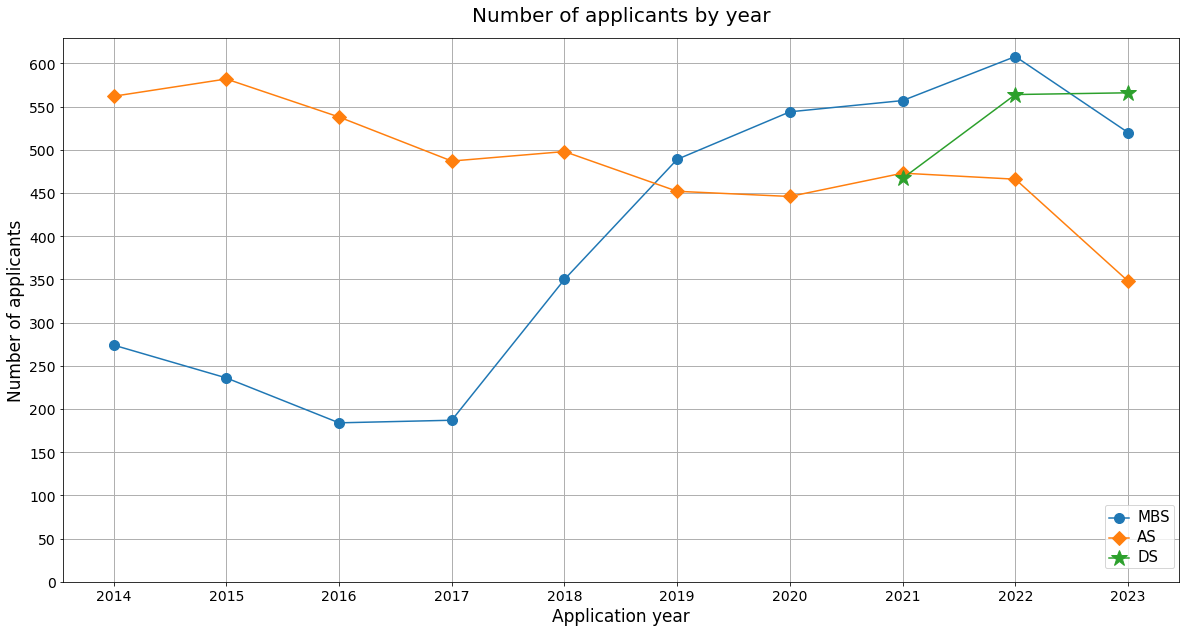

In [96]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (20,10))
plt.plot(years_G0N0, years_df_G0N0['Number of applicants'], marker = 'o', markersize = 10, label = 'MBS');
plt.plot(years_N321, years_df_N321['Number of applicants'], marker = 'D', markersize = 10, label = 'AS');
plt.plot(years_N3UD, years_df_N3UD['Number of applicants'], marker = '*', markersize = 17, label = 'DS');

plt.xticks(np.arange(2014,2024,1));
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.title('Number of applicants by year', fontsize = 20, y = 1.02);
plt.grid(True, linewidth = 1);

legend = plt.legend();
legend.set_bbox_to_anchor((1, 0.15))
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)
legend.get_texts()[2].set_fontsize(15)

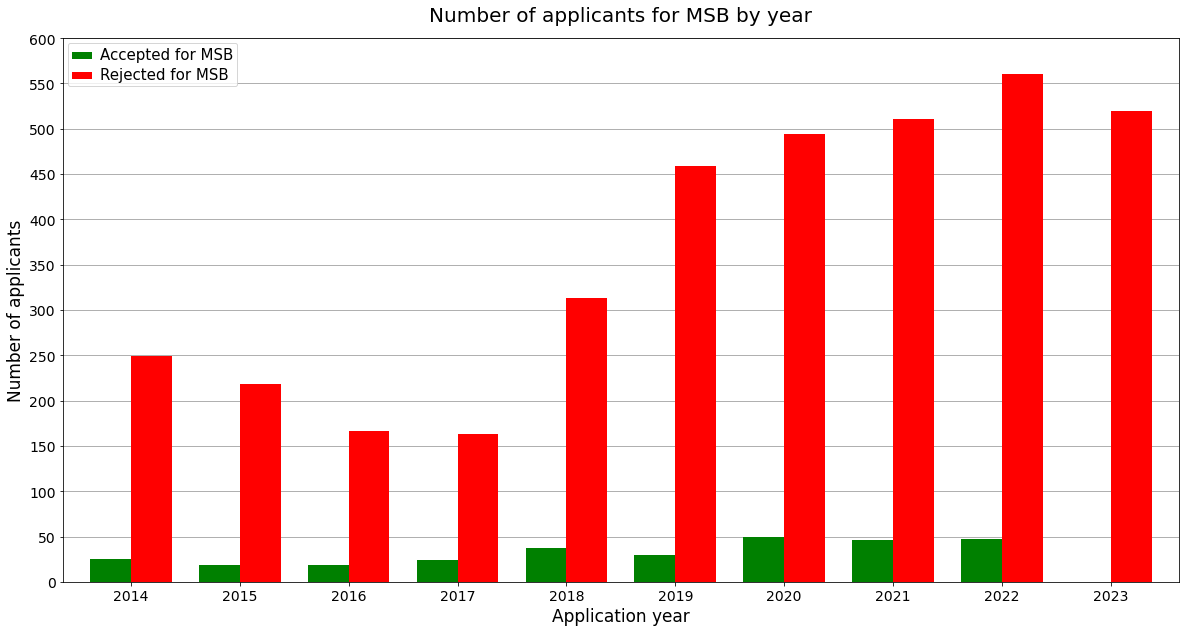

In [100]:
tailored_df_MSB_AS.plot(x='Year', y=['Accepted for MSB', 'Rejected for MSB'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for MSB by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)

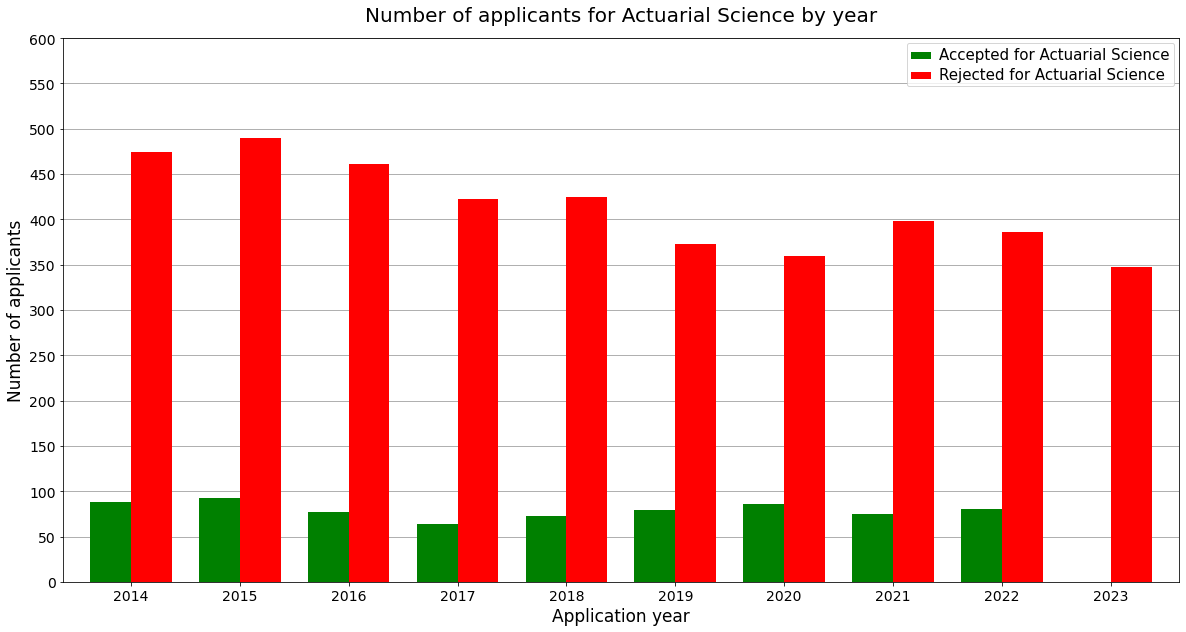

In [131]:
tailored_df_MSB_AS.plot(x='Year', y=['Accepted for Actuarial Science', 'Rejected for Actuarial Science'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for Actuarial Science by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)

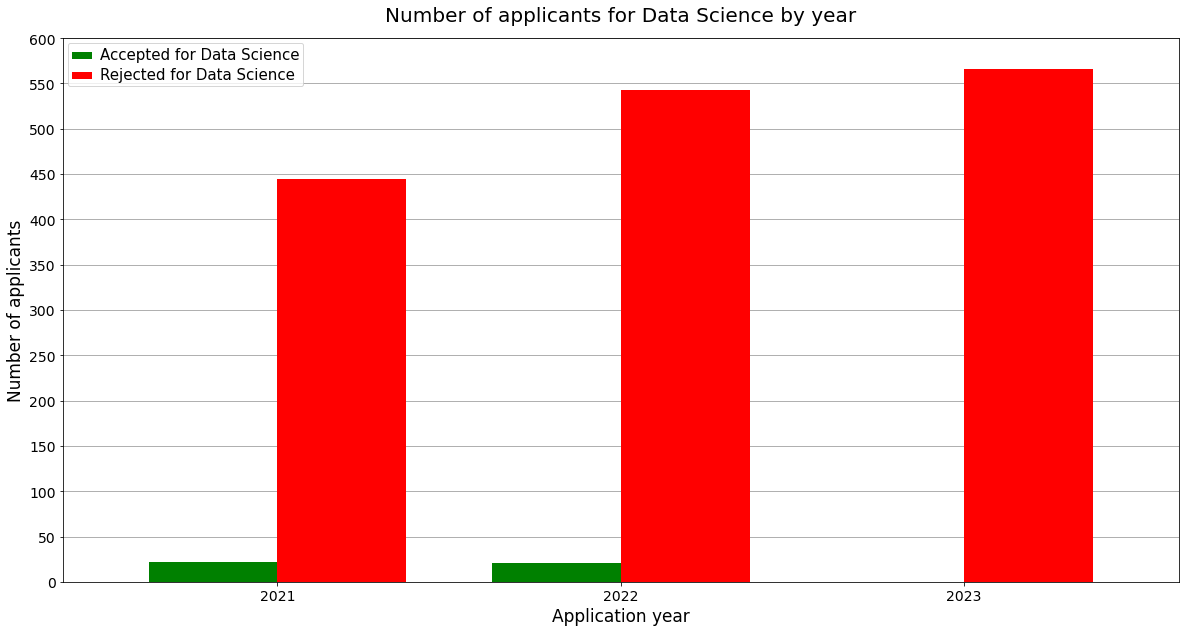

In [132]:
tailored_df_DS.plot(x='Year', y=['Accepted for Data Science', 'Rejected for Data Science'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,650,50));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for Data Science by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.get_texts()[0].set_fontsize(15)
legend.get_texts()[1].set_fontsize(15)

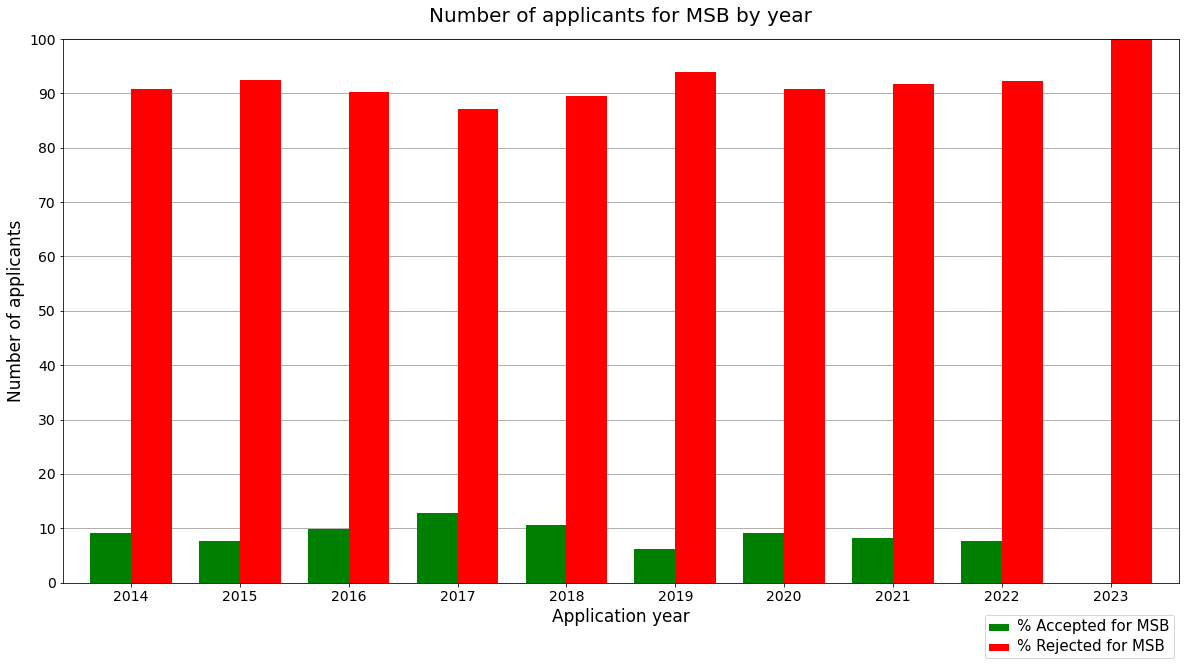

In [112]:
tailored_df_MSB_AS.plot(x='Year', y=['% Accepted for MSB', '% Rejected for MSB'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for MSB by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);

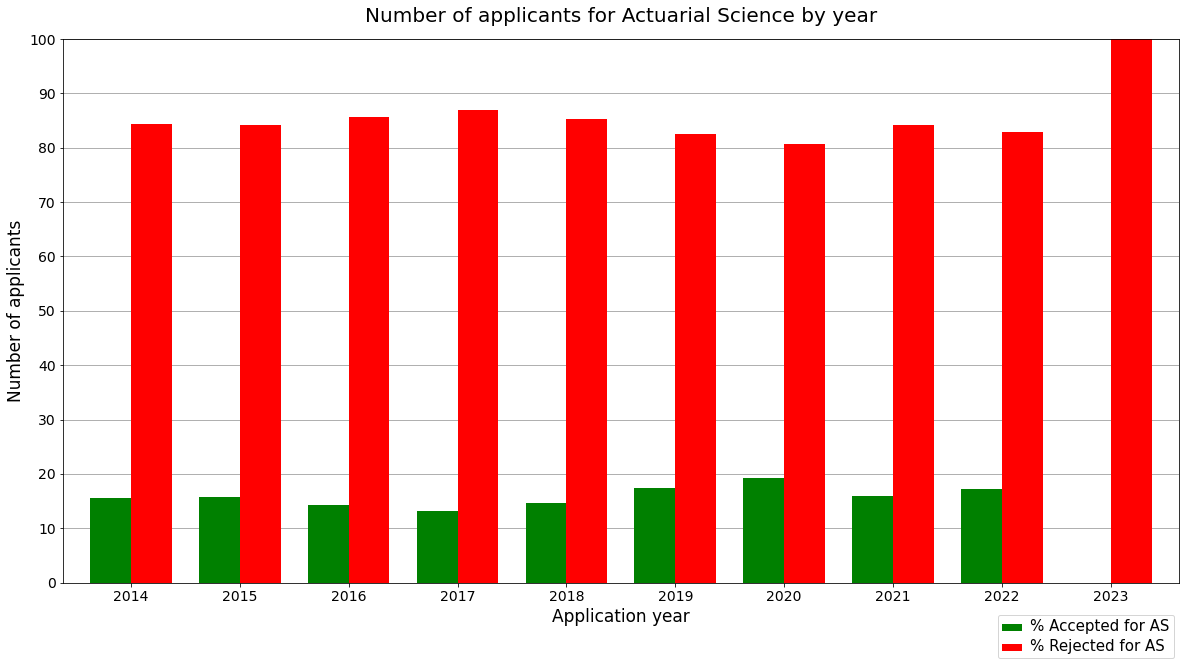

In [134]:
tailored_df_MSB_AS.plot(x='Year', y=['% Accepted for AS', '% Rejected for AS'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for Actuarial Science by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);

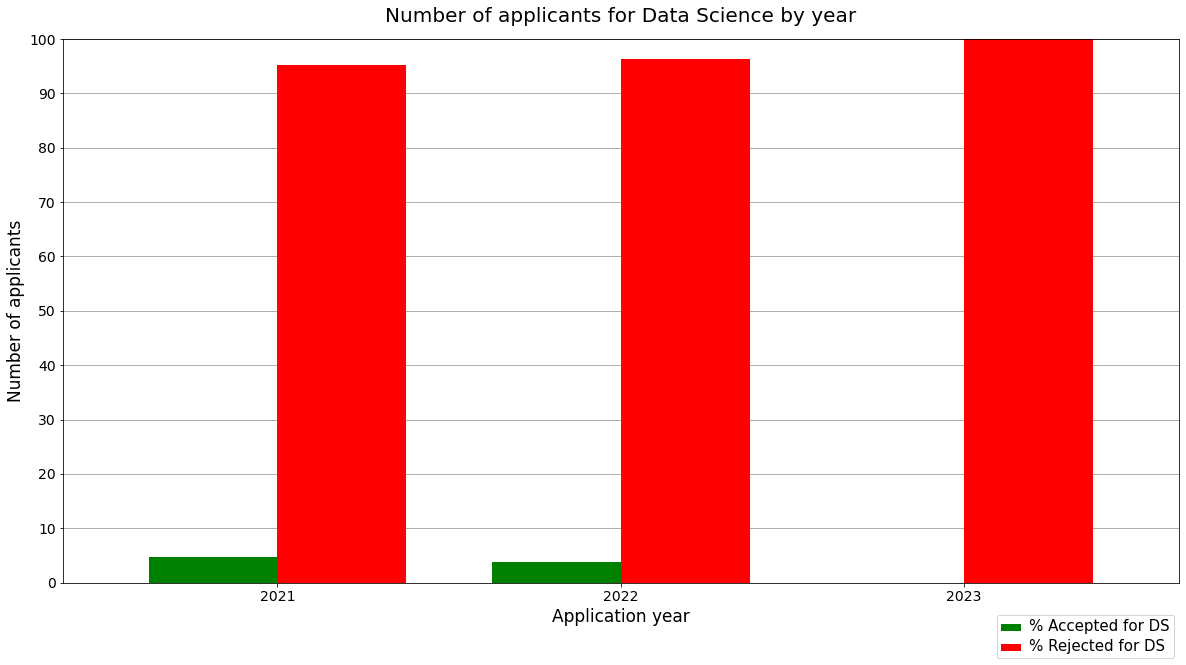

In [139]:
tailored_df_DS.plot(x='Year', y=['% Accepted for DS', '% Rejected for DS'], kind='bar', figsize = (20, 10), color=['green', 'red'], width = 0.75, zorder = 2);
plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for Data Science by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);

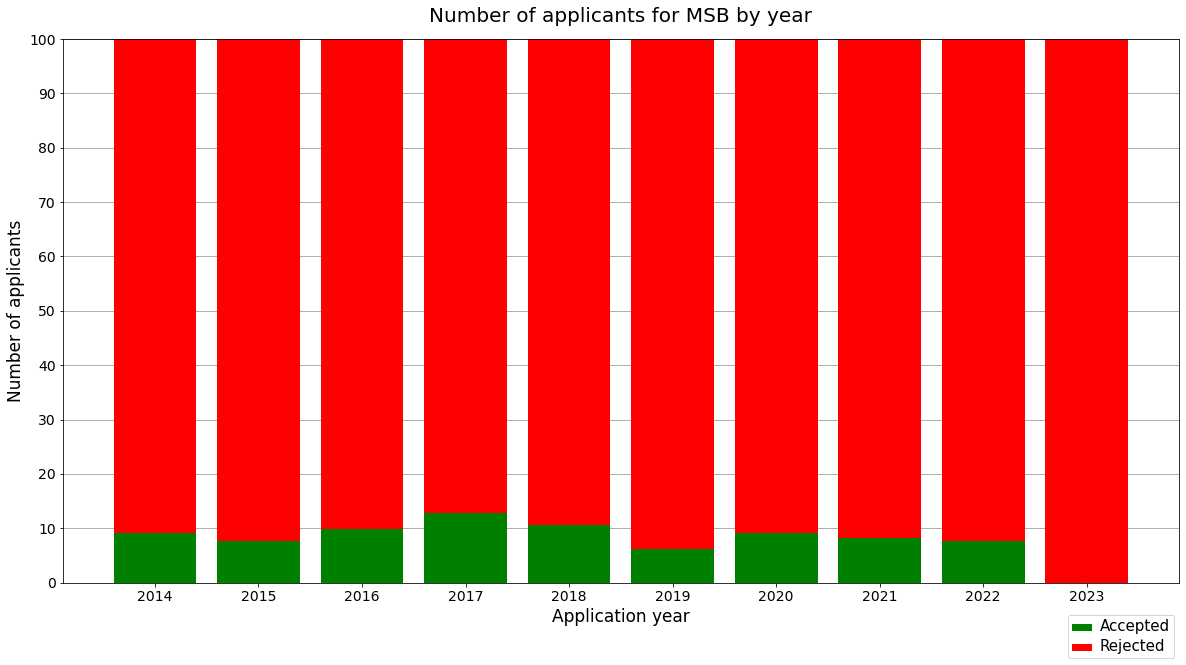

In [128]:
plt.figure(figsize = (20,10))
plt.bar(years_G0N0, tailored_df_MSB_AS['% Accepted for MSB'], color = 'green', label = 'Accepted', zorder = 2);
plt.bar(years_G0N0, tailored_df_MSB_AS['% Rejected for MSB'], bottom = tailored_df_MSB_AS['% Accepted for MSB'], color = 'red', label = 'Rejected', zorder = 2);

plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(np.arange(2014,2024,1))
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for MSB by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);

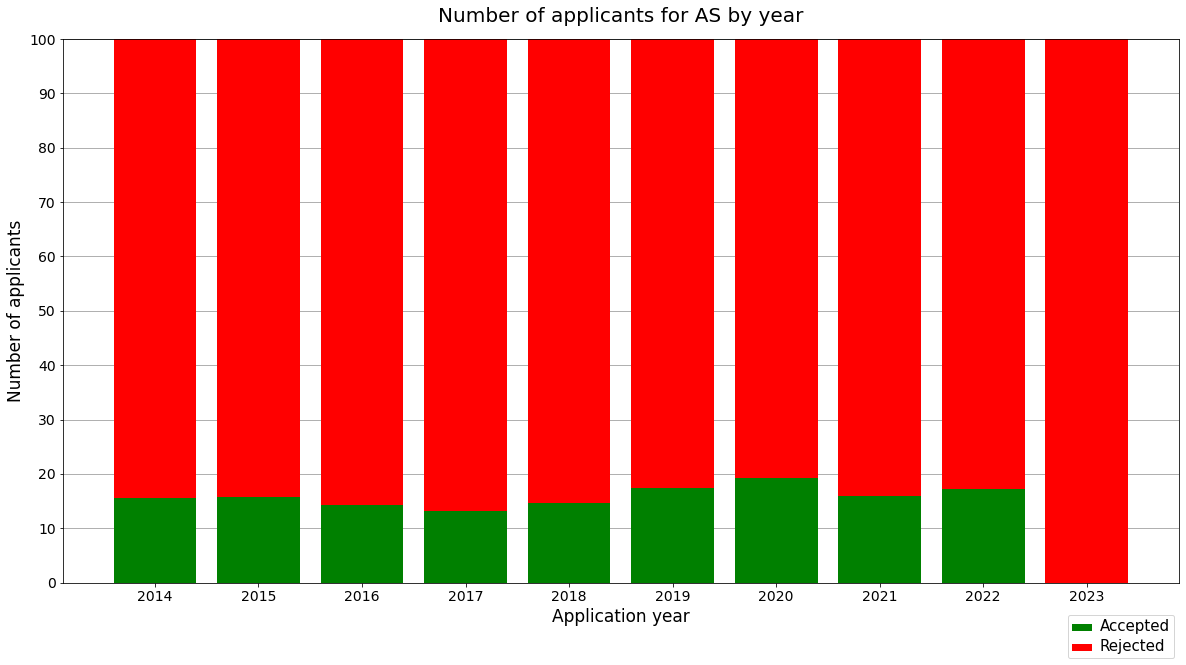

In [140]:
plt.figure(figsize = (20,10))
plt.bar(years_N321, tailored_df_MSB_AS['% Accepted for AS'], color = 'green', label = 'Accepted', zorder = 2);
plt.bar(years_N321, tailored_df_MSB_AS['% Rejected for AS'], bottom = tailored_df_MSB_AS['% Accepted for AS'], color = 'red', label = 'Rejected', zorder = 2);

plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(np.arange(2014,2024,1))
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for AS by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);

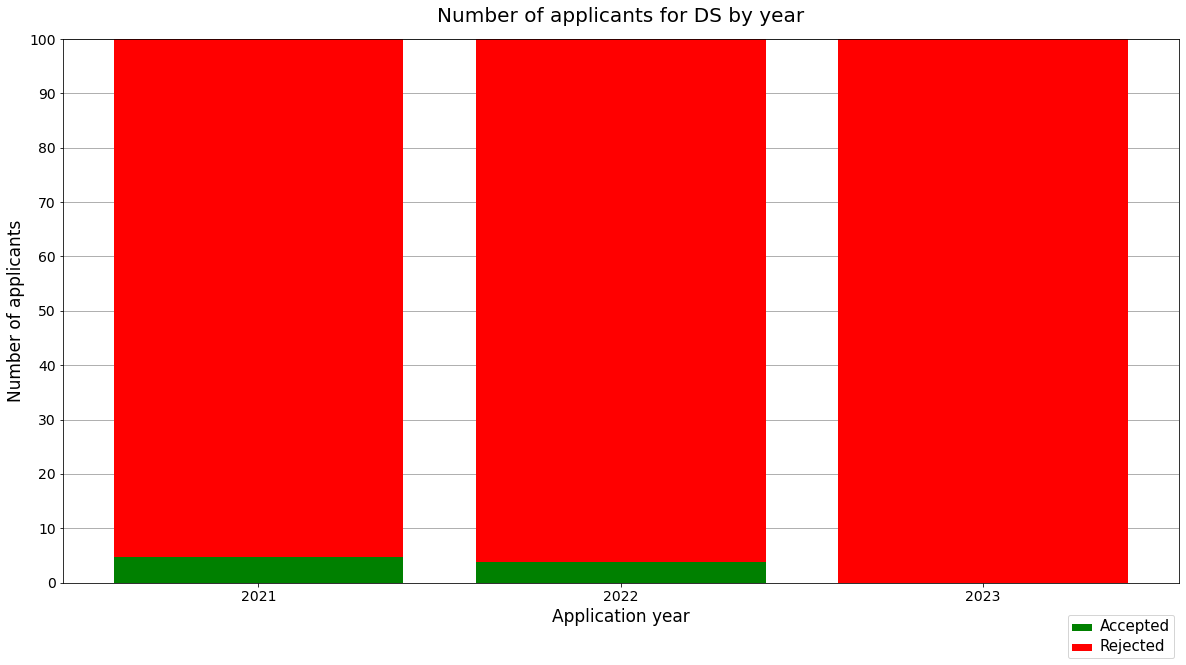

In [143]:
plt.figure(figsize = (20,10))
plt.bar(years_N3UD, tailored_df_DS['% Accepted for DS'], color = 'green', label = 'Accepted', zorder = 2);
plt.bar(years_N3UD, tailored_df_DS['% Rejected for DS'], bottom = tailored_df_DS['% Accepted for DS'], color = 'red', label = 'Rejected', zorder = 2);

plt.xlabel('Application year', fontsize = 17);
plt.ylabel('Number of applicants', fontsize = 17);

plt.xticks(np.arange(2021,2024,1))
plt.yticks(np.arange(0,110,10));

plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)

plt.title('Number of applicants for DS by year', fontsize = 20, y = 1.02);
plt.grid(True, axis = 'y', linewidth = 1, zorder = 0)

legend = plt.legend();
legend.set_bbox_to_anchor((1, -0.05));
legend.get_texts()[0].set_fontsize(15);
legend.get_texts()[1].set_fontsize(15);
plt.ylim(0, 100);